In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [12]:
df = pd.read_csv("countries of the world.csv")

# Countries of the World
#### -> Exploring the relationships between countries

In [13]:
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### All commas will be treated as periods

In [14]:
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [15]:
df.columns = ['country', 'region', 'pop', 'area', 'pop den', 'coastline', 'net migration', 'infant mortality', 'gdp', 'literacy', 'phones', 'arable', 'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agri', 'industry', 'service']

<AxesSubplot:title={'center':'Area vs. Population'}, xlabel='area', ylabel='pop'>

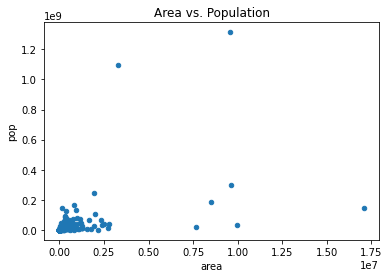

In [16]:
df.plot.scatter('area', 'pop', title = 'Area vs. Population')

##### In the scatterplot Area vs. Population, there appears to be a very weak positive relationship. To test this theory a simple linear regression will be used to examine the relationship.

In [26]:
X = df['area'] 
Y = df['pop']

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     63.79
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           7.11e-14
Time:                        15:19:57   Log-Likelihood:                -4512.1
No. Observations:                 227   AIC:                             9028.
Df Residuals:                     225   BIC:                             9035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.023e+07    7.3e+06      1.401      0.1

#### The coefficient for area is positive as predicted by the scatterplot and is significant to the 0.01 p-value level. But when examing the R-squared we find that it only explains about 22.1% of the variance. Therefore the regression is rather unreliable because it does not fit the model very well.